# Sorghum Yield Predictions with Ensemble Models

In this notebook, I use python sklearn package to train following ensemble models for days to bloom of sorghum 

- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)
- [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor)
- [ExtraTreesregressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor)
- [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [StackingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor)
- [VotingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor)
- [HistGradientBoostingRegressor]()

To compare above models, we used the following metrics: 
- [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)
- [Explained Variance Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score) 


In [1]:
#important libraries
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,\
StackingRegressor,VotingRegressor,HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import itertools
from itertools import permutations
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set()

%matplotlib inline

## Import Train and Test Data

In [2]:
df = pd.read_csv('../data/data-1.1.csv',index_col = 0)
df.head() 

PlotID Treatment         PI      X350      X351      X352      X353  \
0    5001        HN  PI 656057  0.085242  0.084198  0.073049  0.062852   
1    5002        HN  PI 656011  0.053529  0.087761  0.089831  0.066536   
2    5014        HN  PI 534117  0.119853  0.089598  0.093482  0.111414   
3    5017        HN  PI 533807  0.058863  0.049627  0.059016  0.077745   
4    5018        HN  PI 533901  0.064216  0.034575  0.051826  0.089094   

       X354      X355      X356      X357      X358      X359      X360  \
0  0.071412  0.076959  0.086402  0.089655  0.068680  0.077627  0.075629   
1  0.070464  0.065440  0.057905  0.061879  0.087529  0.083688  0.066741   
2  0.079122  0.059123  0.080614  0.111972  0.087410  0.104930  0.096836   
3  0.079420  0.055876  0.059790  0.094332  0.116325  0.089248  0.075353   
4  0.077970  0.062251  0.051876  0.044570  0.036965  0.046616  0.059309   

       X361      X362      X363      X364      X365      X366      X367  \
0  0.049378  0.047664  0.048732  0.053430  0.059725  0.043177  0.055788   
1  0.054267  0.042131  0.050978  0.056994  0.045107  0.046368  0.043490   
2  0.053224  0.080590  0.084966  0.075567  0.074128  0.078823  0.067031   
3  0.093575  0.072879  0.064022  0.059245  0.048701  0.053283  0.061215   
4  0.065469  0.073629  0.063743  0.058155  0.068103  0.052707  0.056907   

       X368      X369      X370      X371      X372      X373      X374  \
0  0.069612  0.049814  0.054452  0.055179  0.045720  0.038621  0.047542   
1  0.042569  0.050927  0.046258  0.041853  0.043365  0.048262  0.047062   
2  0.053021  0.057072  0.060873  0.065333  0.067081  0.061981  0.071762   
3  0.064495  0.060455  0.059920  0.057543  0.055027  0.057817  0.058994   
4  0.058916  0.031363  0.044537  0.052850  0.044938  0.036397  0.040385   

       X375      X376      X377      X378      X379      X380      X381  \
0  0.053812  0.049443  0.042255  0.043361  0.048633  0.051029  0.044424   
1  0.048264  0.051650  0.044692  0.043194  0.040966  0.035022  0.041995   
2  0.075621  0.067405  0.063775  0.060381  0.061531  0.067389  0.065502   
3  0.051891  0.041229  0.045221  0.042682  0.039888  0.041793  0.035916   
4  0.035704  0.023696  0.038334  0.038128  0.034922  0.039170  0.031483   

       X382      X383      X384      X385      X386      X387      X388  \
0  0.043408  0.041854  0.032599  0.041451  0.048299  0.048850  0.050056   
1  0.044352  0.042166  0.041462  0.043841  0.043980  0.042063  0.041588   
2  0.061511  0.059425  0.060912  0.060602  0.060764  0.061790  0.062637   
3  0.041577  0.048101  0.041999  0.045428  0.046849  0.044891  0.045510   
4  0.029924  0.030768  0.026792  0.031363  0.036194  0.035529  0.028020   

       X389      X390      X391      X392      X393      X394      X395  \
0  0.046709  0.043648  0.042465  0.038687  0.046113  0.051060  0.044858   
1  0.038251  0.035009  0.034469  0.037531  0.040736  0.042420  0.042195   
2  0.064547  0.063739  0.060583  0.061476  0.058410  0.057525  0.062045   
3  0.044386  0.044945  0.047080  0.044974  0.047557  0.047684  0.041828   
4  0.027310  0.032024  0.036186  0.031191  0.031170  0.032243  0.030183   

       X396      X397      X398      X399      X400      X401      X402  \
0  0.047175  0.049994  0.049110  0.043823  0.043862  0.041952  0.039572   
1  0.041240  0.040235  0.039823  0.040379  0.041654  0.042781  0.042810   
2  0.058640  0.057564  0.058823  0.058657  0.056359  0.056490  0.059140   
3  0.045990  0.043352  0.040511  0.048086  0.046338  0.044907  0.046880   
4  0.031515  0.029055  0.027901  0.034071  0.032154  0.031995  0.034898   

       X403      X404      X405      X406      X407      X408      X409  \
0  0.044624  0.044988  0.046128  0.048967  0.043201  0.043568  0.048380   
1  0.041331  0.044993  0.048847  0.048443  0.042648  0.044995  0.048170   
2  0.060611  0.057030  0.055395  0.058313  0.059271  0.057111  0.056335   
3  0.048702  0.051569  0.052440  0.051471  0.054499  0.058699  0.058800   
4  0.034644  0.034109  0.0

In [3]:
#filter nan out on DaysToBloom column
print(df.shape)
df = df[~df.DaysToBloom.isnull()]
print(df.shape)

(437, 2161)
(437, 2161)


### Calculate Principal Components

In [5]:
sub = df[df.columns[3:-7]] #reflectance data

In [6]:
n_components =30
pca = PCA(n_components)
sub_trans = pca.fit_transform(sub.values)
sub_df = pd.DataFrame(data = sub_trans
         , columns = ["PC"+str(i) for i in list(range(1,n_components+1))])
sub_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,1.556747,0.045747,-0.031427,0.081840,-0.002996,0.016813,-0.064579,-0.052998,0.020844,-0.016639,-0.010966,0.028946,0.036099,-0.004921,0.013489,-0.012717,-0.015670,-0.017632,0.010761,0.010701,-0.005801,0.007933,-0.004265,0.014879,0.002465,0.009391,-0.011593,0.002259,0.013056,-0.000405
1,-0.263040,0.469157,-0.162491,0.023772,-0.084767,-0.090431,-0.037389,-0.025615,0.036944,0.034008,0.012400,-0.004542,0.026077,-0.020928,0.023178,-0.006043,-0.009872,-0.007062,-0.022902,0.003568,0.002209,-0.013053,0.006317,0.001407,-0.005480,-0.007684,-0.005934,0.007826,0.005845,-0.011382
2,0.815868,-0.014109,-0.275054,0.157559,-0.119518,0.002671,0.000863,0.005744,0.028862,-0.072055,-0.008472,0.002993,-0.027384,0.011743,0.018621,0.023401,0.030105,-0.023437,-0.004350,-0.000054,0.002919,-0.011634,0.008338,-0.002722,0.011780,-0.012101,0.006306,-0.005885,-0.011406,0.001411
3,-0.006932,-0.232415,0.109062,-0.092387,-0.139510,-0.058696,-0.039002,0.021807,0.010634,0.004634,0.039678,0.000751,-0.031430,-0.023340,-0.033017,-0.025294,-0.003270,-0.003341,-0.010947,-0.002570,0.009778,0.008533,-0.005576,0.008124,0.000022,0.012318,0.000037,-0.002721,0.011760,0.012837
4,1.089662,0.043452,0.078539,-0.152434,0.037314,0.001337,-0.009875,0.060970,-0.038281,0.021879,-0.011999,-0.000442,-0.001140,-0.012192,0.044828,0.018179,-0.013097,0.042442,-0.008091,0.028053,0.002629,0.014644,-0.000959,-0.012615,0.000973,-0.002685,0.007413,-0.010618,0.003929,0.010415


<AxesSubplot:>

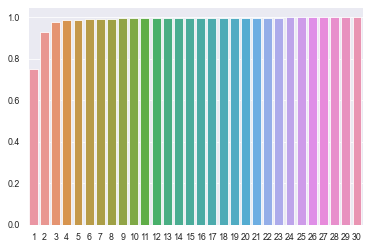

In [8]:
total_var = pca.explained_variance_ratio_.sum() * 100
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

sns.set_context('paper')
sns.barplot(x = list(range(1,n_components+1,1)), y = exp_var_cumul)

In [9]:
total_var #explained variance

99.9452805977982

In [10]:
sub_df['DaysToBloom'] = df['DaysToBloom']
sub_df['treatment'] = df.Treatment

In [11]:
sub_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,DaysToBloom,treatment
0,1.556747,0.045747,-0.031427,0.081840,-0.002996,0.016813,-0.064579,-0.052998,0.020844,-0.016639,-0.010966,0.028946,0.036099,-0.004921,0.013489,-0.012717,-0.015670,-0.017632,0.010761,0.010701,-0.005801,0.007933,-0.004265,0.014879,0.002465,0.009391,-0.011593,0.002259,0.013056,-0.000405,83.0,HN
1,-0.263040,0.469157,-0.162491,0.023772,-0.084767,-0.090431,-0.037389,-0.025615,0.036944,0.034008,0.012400,-0.004542,0.026077,-0.020928,0.023178,-0.006043,-0.009872,-0.007062,-0.022902,0.003568,0.002209,-0.013053,0.006317,0.001407,-0.005480,-0.007684,-0.005934,0.007826,0.005845,-0.011382,76.0,HN
2,0.815868,-0.014109,-0.275054,0.157559,-0.119518,0.002671,0.000863,0.005744,0.028862,-0.072055,-0.008472,0.002993,-0.027384,0.011743,0.018621,0.023401,0.030105,-0.023437,-0.004350,-0.000054,0.002919,-0.011634,0.008338,-0.002722,0.011780,-0.012101,0.006306,-0.005885,-0.011406,0.001411,55.0,HN
3,-0.006932,-0.232415,0.109062,-0.092387,-0.139510,-0.058696,-0.039002,0.021807,0.010634,0.004634,0.039678,0.000751,-0.031430,-0.023340,-0.033017,-0.025294,-0.003270,-0.003341,-0.010947,-0.002570,0.009778,0.008533,-0.005576,0.008124,0.000022,0.012318,0.000037,-0.002721,0.011760,0.012837,71.0,HN
4,1.089662,0.043452,0.078539,-0.152434,0.037314,0.001337,-0.009875,0.060970,-0.038281,0.021879,-0.011999,-0.000442,-0.001140,-0.012192,0.044828,0.018179,-0.013097,0.042442,-0.008091,0.028053,0.002629,0.014644,-0.000959,-0.012615,0.000973,-0.002685,0.007413,-0.010618,0.003929,0.010415,71.0,HN


In [12]:
sub_df.shape

(437, 32)

In [8]:
#df.rename(columns = {'Treatment':'treatment'},inplace = True)

In [14]:
## Data Split
X = sub_df[sub_df.columns[:-2]]
y = sub_df[['treatment','DaysToBloom']]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

train_data = pd.concat([X_train, y_train], axis = 1)
print(f"Train Dataset: {train_data.shape[0]} row/records. F: {train_data[train_data.treatment=='HN'].shape[0]} and N: {train_data[train_data.treatment =='LN'].shape[0]}\n")

test_data = pd.concat([X_test,y_test], axis = 1)
print(f"Train Dataset: {test_data.shape[0]} row/records. F: {test_data[test_data.treatment=='HN'].shape[0]} and N: {test_data[test_data.treatment =='LN'].shape[0]}")



Train Dataset: 305 row/records. F: 165 and N: 140

Train Dataset: 132 row/records. F: 70 and N: 62


In [16]:
#features
features = list(sub_df.columns)[:-2]


## Important Functions

In [17]:
#TODO: to be put in a util.py
def initialize_models(models):
    for i in range(len(models)):
        model_name, model = models[i]
        models[i] = (model_name,model)
    return models
def train_model(model,dataset, features):
    #x_feats = list(features[features.Types =='features'].Attributes)
    x_feats = features #pass in as a list
    X_train, y_train = dataset[x_feats], list(dataset['DaysToBloom'])
    model.fit(X_train,y_train)
    return model

def test_model(model, test_dataset, features):
    #x_feats = list(features[features.Types =='features']['Attributes'])
    x_feats = features #pass in as a list
    X_test, y_test = test_dataset[x_feats], list(test_dataset['DaysToBloom'])
    preds = model[1].predict(X_test)
    
    #find scores
    mse, r2, var = np.sqrt(mean_squared_error(y_test,preds)), r2_score(y_test,preds), explained_variance_score(y_test,preds)
    score_df = pd.DataFrame.from_dict({
        "Model": [model[0] for _ in range(3)],
        "Metrics": ['RMSE', 'R2', 'Explained_Var_Score'],
        "Scores":[mse,r2,var]
    })
    
    return (score_df,(model[0], preds))

def plot_index(row, col):
    
    indices = []
    for i in row:
        for j in col:
            indices.append((i,j))
    return indices

def plot_pred(predictions,treatment):
    #predictions: a list of y_true, followed by predictions from different models
    sns.set_context('talk')
    x_label, y_true_df = predictions[0][0], predictions[0][1]
    sub_row, sub_col = 0, 0
    if len(predictions[1:])%2 ==0:
        sub_row, sub_col = 2, round(len(predictions[1:])/2)
    else:
        sub_row,sub_col = 2, round(((len(predictions[1:])-1)+1)/2)
    
    fig, axes = plt.subplots(sub_row, sub_col, figsize = (20,8))
    
    #make plots
    indices = plot_index(list(range(sub_row)), list(range(sub_col)))
    items = zip(indices, predictions[1:])
    
    for item in items:
        y_label = 'predictions'
        ax = axes[item[0][0], item[0][1]]
        preds = item[1][1]
        title = item[1][0]
        
        #colors
        colors = ["red", "green"]
        fun =lambda x: 1 if x =="F" else 0
        color_indices = [fun(i) for i in treatment]
        colormap = matplotlib.colors.ListedColormap(colors)
        
        temp_df = pd.DataFrame.from_dict({
            'y_true':list(y_true_df['DaysToBloom']) ,
            'y_preds': preds,
            'treatment': treatment
        })
        
        #full nitrogen
        #sns.regplot(x = list(y_true_df['yield']), y = preds, ax = ax, color ='b' )
        sns.regplot(x = temp_df[temp_df.treatment=='HN']['y_true'], y =temp_df[temp_df.treatment=='HN']['y_preds'], ax = ax, color ='g' )
        
        #ndep nitrogen
        sns.regplot(x = temp_df[temp_df.treatment=='LN']['y_true'], y =temp_df[temp_df.treatment=='LN']['y_preds'], ax = ax, color ='r' )
        
        #ALL 
        sns.regplot(x = temp_df['y_true'], y =temp_df['y_preds'], ax = ax, color ='black', marker ='+')
        ax.set_title(title)
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label) 
        
   
    plt.tight_layout()
        
def plot_scores(df):
    sns.set_context('talk')
    fig, axes = plt.subplots(3,1, figsize = (12,12))
    print(type(axes[0]))
    i = 0
    for metric in df.Metrics.unique():
        sns.barplot(x='Scores', y='Model', data =df[df.Metrics ==metric], ax = axes[i])
        #axes[i].set_title(f'Comparing Different Models on {metric} Metric')
        axes[i].set_ylabel('')
        axes[i].set_xlabel(metric)
        #axes[i].tick_params(axis='x', rotation=30)
        i+=1
    #plt.xticks(rotation=20)
    plt.tight_layout()
    
def build_models(train_dataset, test_dataset, features, models):
    #train_dataset: a tuple (data_name, data_df)
    #test_dataset : df containing testing data
    #features: contains all features and dependent variables
    #models : list of models, each model is a tuple (model_name, actual model)
    print('program starts ...')
    scores = []
    predictions = [('true_y', test_dataset[['treatment','DaysToBloom']])]
    for model in models: 
        trained_model = train_model(model[1], train_dataset, features)
        scores_df, preds_tp = test_model((model[0],trained_model), test_dataset, features)
        scores.append(scores_df)
        predictions.append(preds_tp)    
    plot_pred(predictions,list(test_dataset['treatment']))
    return pd.concat(scores)
    print('program finish.')
        

## Initialize Ensemble Models

In [18]:
## Initialize Models with default parameters
estimators = 100
models = [("AdaBoost", AdaBoostRegressor()),('Random Forest', RandomForestRegressor(estimators)),
          ('Gradient Boosting', GradientBoostingRegressor()),('Bagging', BaggingRegressor()),
          ('ExtraTrees', ExtraTreesRegressor(estimators)),
           ('HistGradient Boosting', HistGradientBoostingRegressor())]

stack_models  = models[0:3]
stack = StackingRegressor(stack_models,stack_models[-2][1])
voting = VotingRegressor(models)
models.append(('Stacking Regressor',stack))
models.append(('Voting Regressor',stack))
# models.append((('Stacking', StackingRegressor(models))))
# models.append(('Voting', VotingRegressor(models)))
models

[('AdaBoost', AdaBoostRegressor()),
 ('Random Forest', RandomForestRegressor()),
 ('Gradient Boosting', GradientBoostingRegressor()),
 ('Bagging', BaggingRegressor()),
 ('ExtraTrees', ExtraTreesRegressor()),
 ('HistGradient Boosting', HistGradientBoostingRegressor()),
 ('Stacking Regressor',
  StackingRegressor(estimators=[('AdaBoost', AdaBoostRegressor()),
                                ('Random Forest', RandomForestRegressor()),
                                ('Gradient Boosting',
                                 GradientBoostingRegressor())],
                    final_estimator=RandomForestRegressor())),
 ('Voting Regressor',
  StackingRegressor(estimators=[('AdaBoost', AdaBoostRegressor()),
                                ('Random Forest', RandomForestRegressor()),
                                ('Gradient Boosting',
                                 GradientBoostingRegressor())],
                    final_estimator=RandomForestRegressor()))]

## Both Treatment


program starts ...


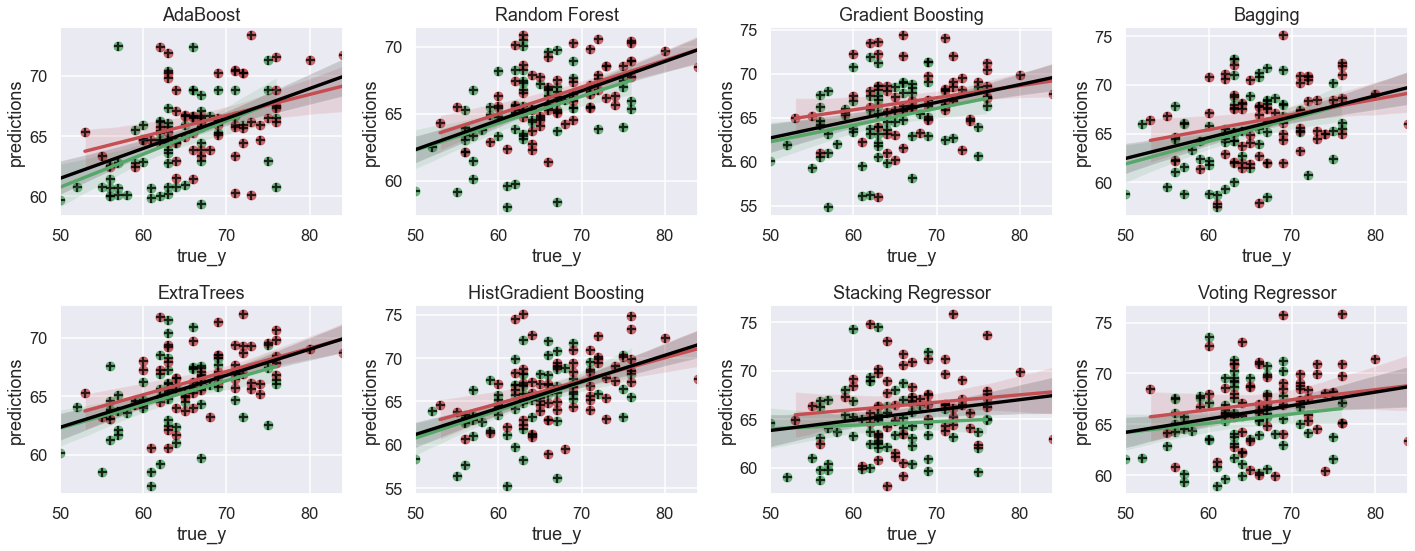

In [19]:
scores_both = build_models(train_data,test_data, features,models)

In [20]:
scores_both.sort_values(['Metrics','Scores'], ascending= False)

,Model,Metrics,Scores
0,Stacking Regressor,RMSE,6.499829
0,Voting Regressor,RMSE,6.341869
0,Gradient Boosting,RMSE,6.057815
0,Bagging,RMSE,5.917808
0,AdaBoost,RMSE,5.412829
0,HistGradient Boosting,RMSE,5.407798
0,ExtraTrees,RMSE,5.350305
0,Random Forest,RMSE,5.269134
1,Random Forest,R2,0.252799
1,ExtraTrees,R2,0.229600


<class 'matplotlib.axes._subplots.AxesSubplot'>


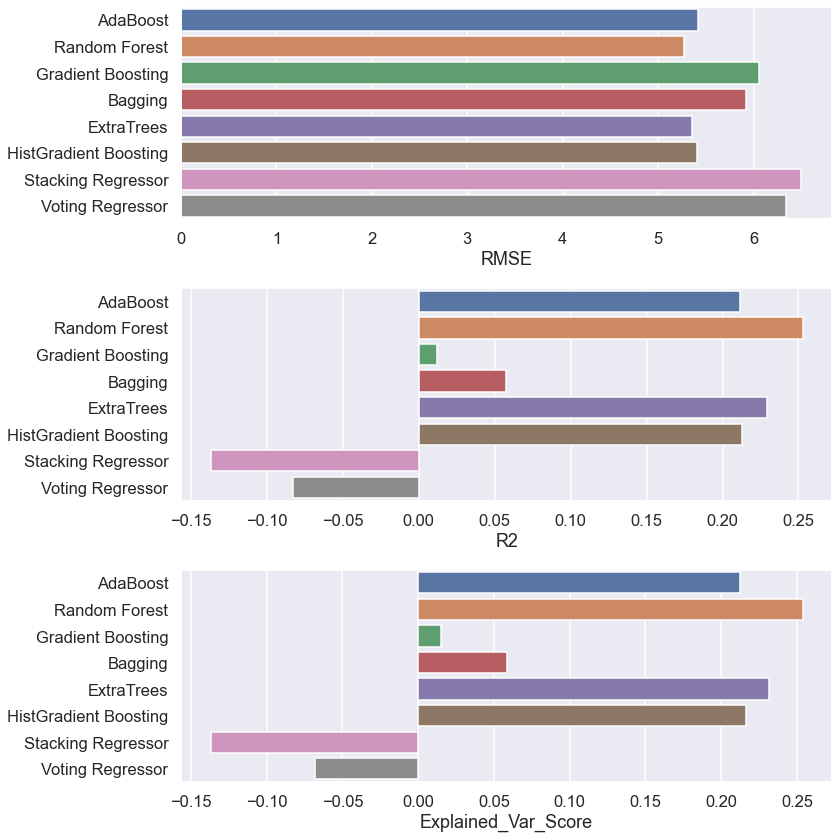

In [21]:
plot_scores(scores_both)

## Full Nitrogen


In [22]:
train_full = train_data[train_data.treatment=='HN']

program starts ...


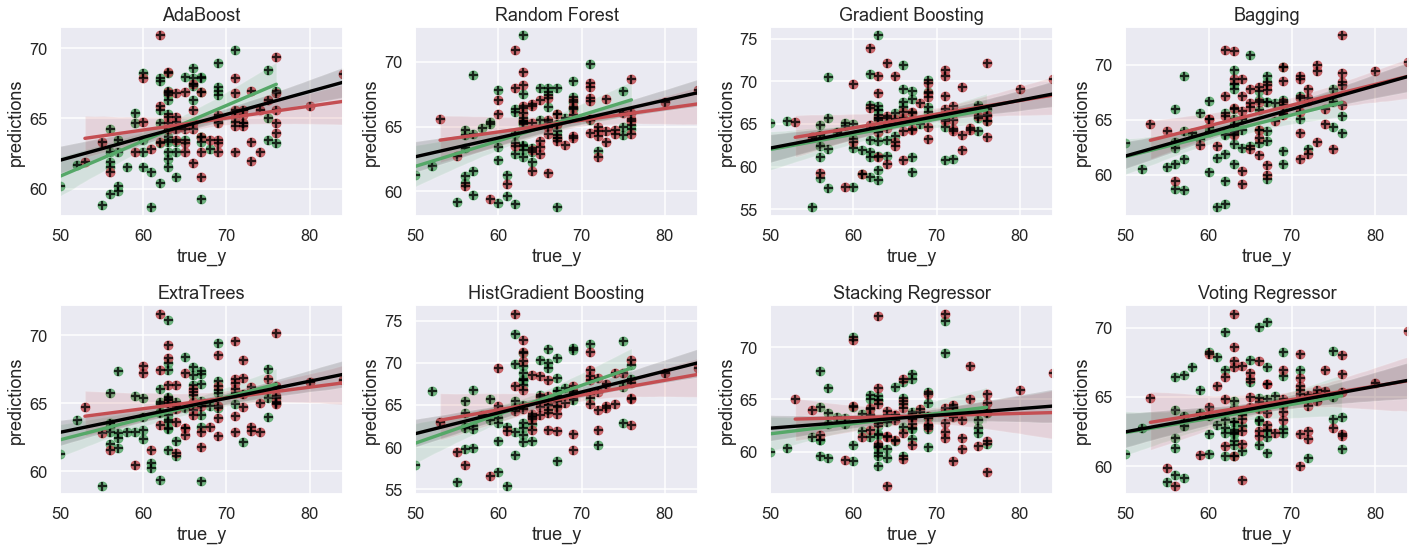

In [23]:
scores_full = build_models(train_full,test_data, features,models)

In [24]:
scores_full.sort_values(['Metrics','Scores'], ascending= False)

,Model,Metrics,Scores
0,Stacking Regressor,RMSE,6.790107
0,Voting Regressor,RMSE,6.144101
0,Gradient Boosting,RMSE,6.006315
0,ExtraTrees,RMSE,5.818929
0,HistGradient Boosting,RMSE,5.801202
0,Random Forest,RMSE,5.734735
0,AdaBoost,RMSE,5.675110
0,Bagging,RMSE,5.619797
1,Bagging,R2,0.150036
1,AdaBoost,R2,0.133223


<class 'matplotlib.axes._subplots.AxesSubplot'>


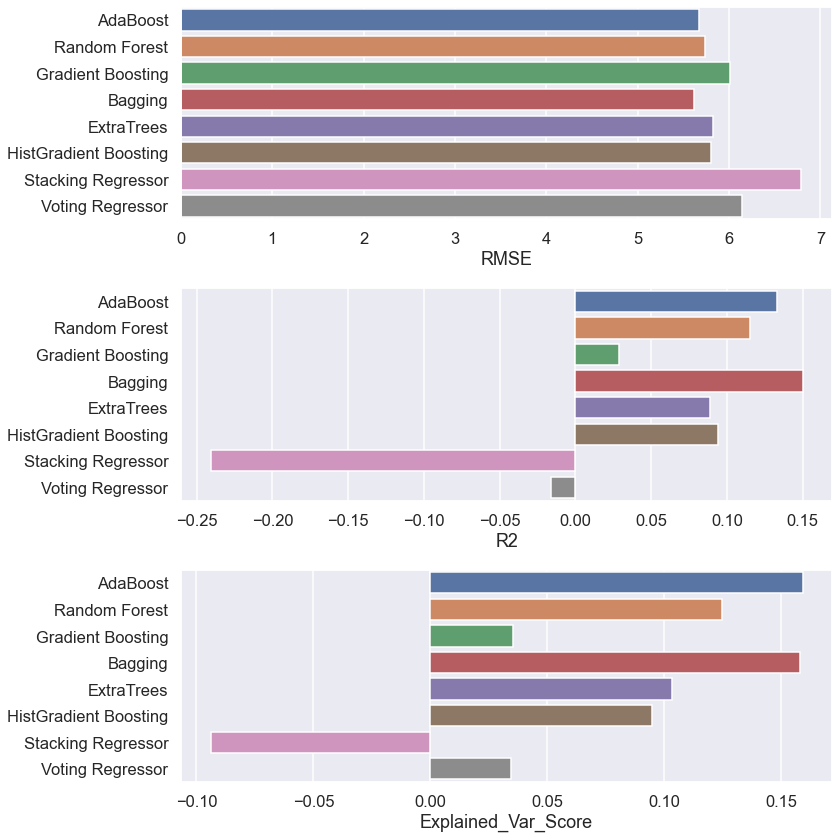

In [25]:
plot_scores(scores_full)

## Nitrogen Deprived

program starts ...


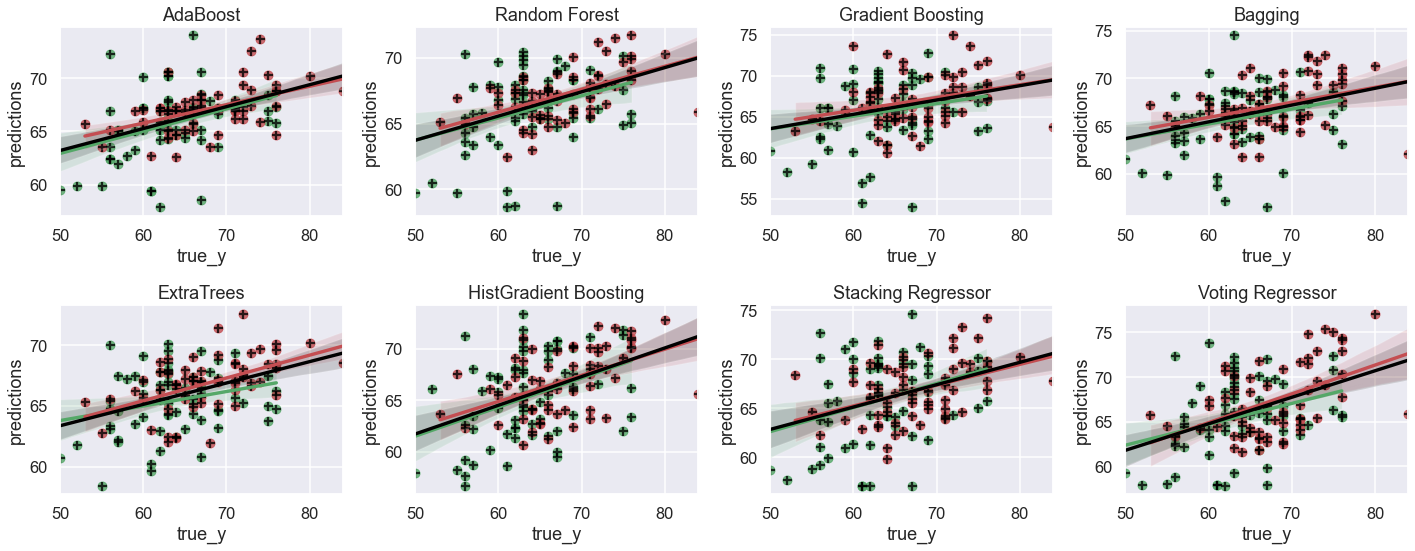

In [26]:
train_ndep = train_data[train_data.treatment=='LN']
scores_ndep = build_models(train_ndep,test_data, features,models)

In [27]:
scores_ndep.sort_values(['Metrics','Scores'], ascending= False)

,Model,Metrics,Scores
0,Gradient Boosting,RMSE,6.139118
0,Stacking Regressor,RMSE,5.920720
0,Bagging,RMSE,5.846943
0,Voting Regressor,RMSE,5.716116
0,Random Forest,RMSE,5.577027
0,ExtraTrees,RMSE,5.537516
0,HistGradient Boosting,RMSE,5.531191
0,AdaBoost,RMSE,5.498094
1,AdaBoost,R2,0.186452
1,HistGradient Boosting,R2,0.176627


<class 'matplotlib.axes._subplots.AxesSubplot'>


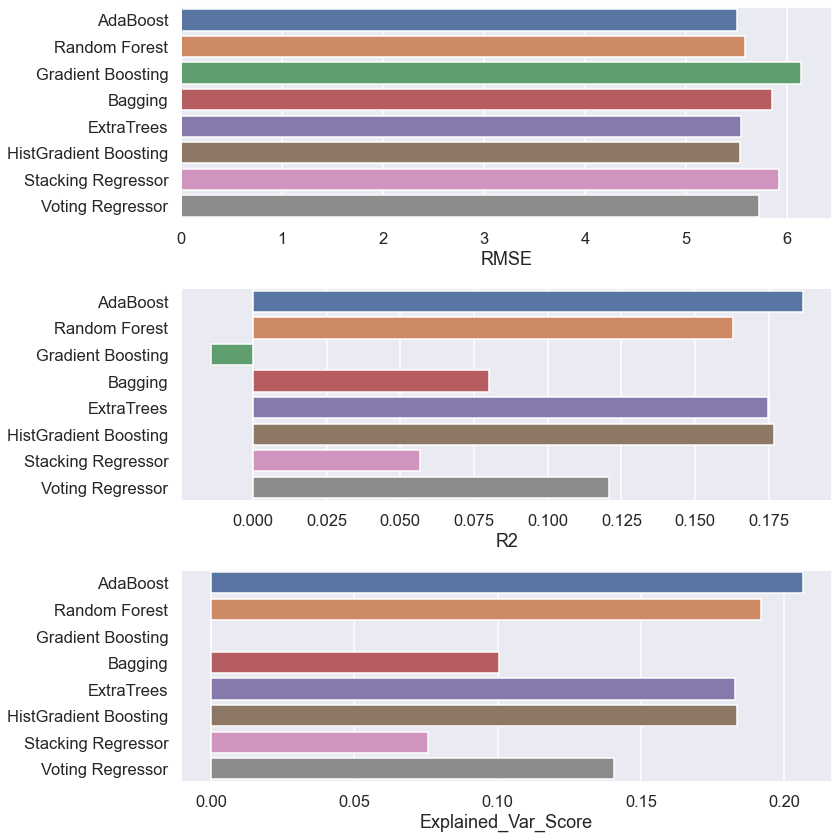

In [28]:
plot_scores(scores_ndep)

In [18]:
#performance measures on train_data
#PCA on reflectance data
#DaysToBloom as predictor
